# Census Income Project

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:



1-A single cell estimate of the population 16+ for each state.

2-Controls for Hispanic Origin by age and sex

3-Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [1]:
import numpy as np
import pandas as pd

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
df=pd.read_csv(url)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Checking Null values in Dataframe

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Encoding the Dataframe

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df
    

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [9]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [10]:
df.drop('Capital_gain',axis=1,inplace=True)

In [11]:
df.drop('Capital_loss',axis=1,inplace=True)

In [12]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,40,39,0


In [13]:
df.dtypes

Age               int64
Workclass         int64
Fnlwgt            int64
Education         int64
Education_num     int64
Marital_status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours_per_week    int64
Native_country    int64
Income            int64
dtype: object

# Visualization of data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

0    24719
1     7841
Name: Income, dtype: int64


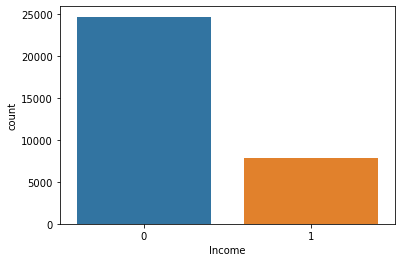

In [15]:
sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

<AxesSubplot:xlabel='Age', ylabel='Count'>

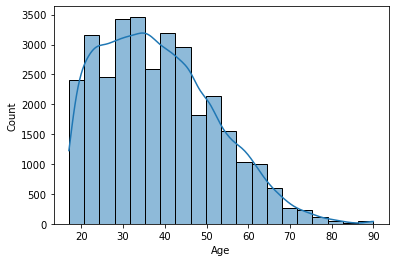

In [16]:
sns.histplot(x='Age',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='Workclass', ylabel='Count'>

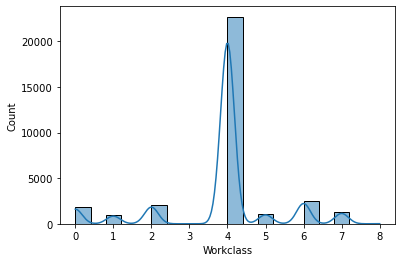

In [17]:
sns.histplot(x='Workclass',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Count'>

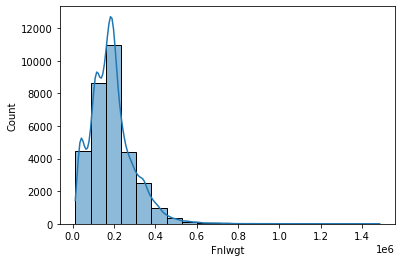

In [18]:
sns.histplot(x='Fnlwgt',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='Education', ylabel='Count'>

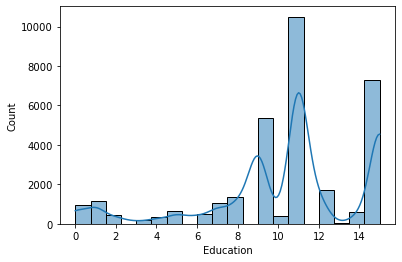

In [19]:
sns.histplot(x='Education',kde=True,bins=20,data=df)

<AxesSubplot:xlabel='Education_num', ylabel='Count'>

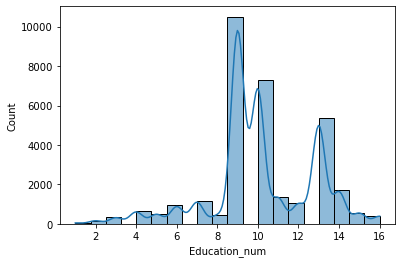

In [20]:
sns.histplot(x='Education_num',kde=True,bins=20,data=df)

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64


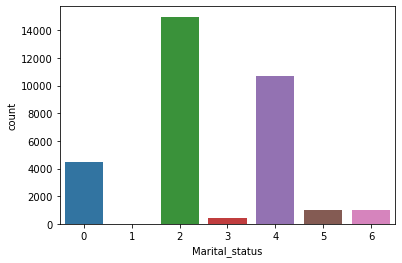

In [21]:
sns.countplot(x='Marital_status',data=df)
print(df['Marital_status'].value_counts())

<AxesSubplot:xlabel='Occupation', ylabel='Count'>

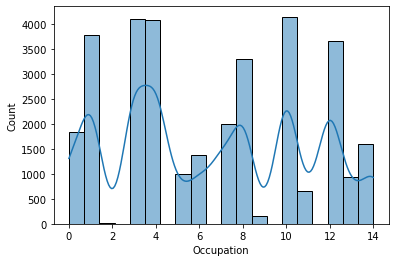

In [22]:
sns.histplot(x='Occupation',kde=True,bins=20,data=df)

0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64


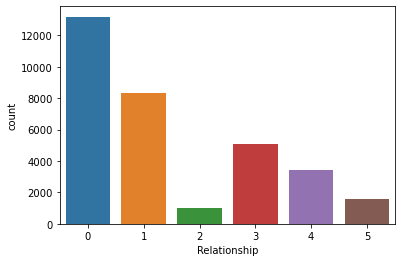

In [23]:
sns.countplot(x='Relationship',data=df)
print(df['Relationship'].value_counts())

4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64


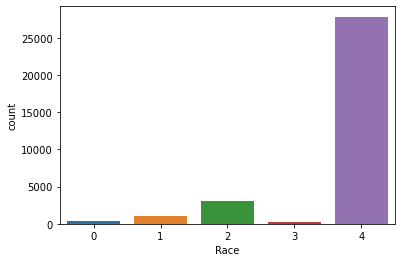

In [24]:
sns.countplot(x='Race',data=df)
print(df['Race'].value_counts())

1    21789
0    10771
Name: Sex, dtype: int64


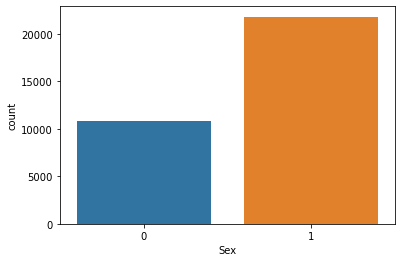

In [25]:
sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

<AxesSubplot:xlabel='Hours_per_week', ylabel='Count'>

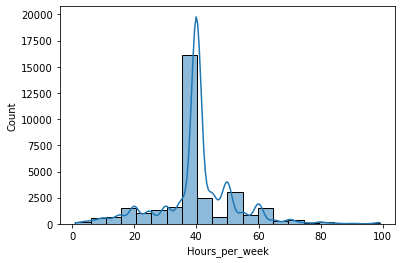

In [26]:
sns.histplot(x='Hours_per_week',data=df,kde=True,bins=20)

<AxesSubplot:xlabel='Native_country', ylabel='Count'>

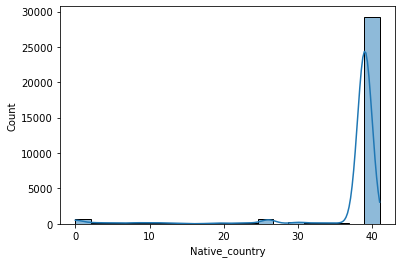

In [27]:
sns.histplot(x='Native_country',bins=20,kde=True,data=df)

# Describing DataSets

In [28]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99.000000,41.000000,1.000000


<AxesSubplot:>

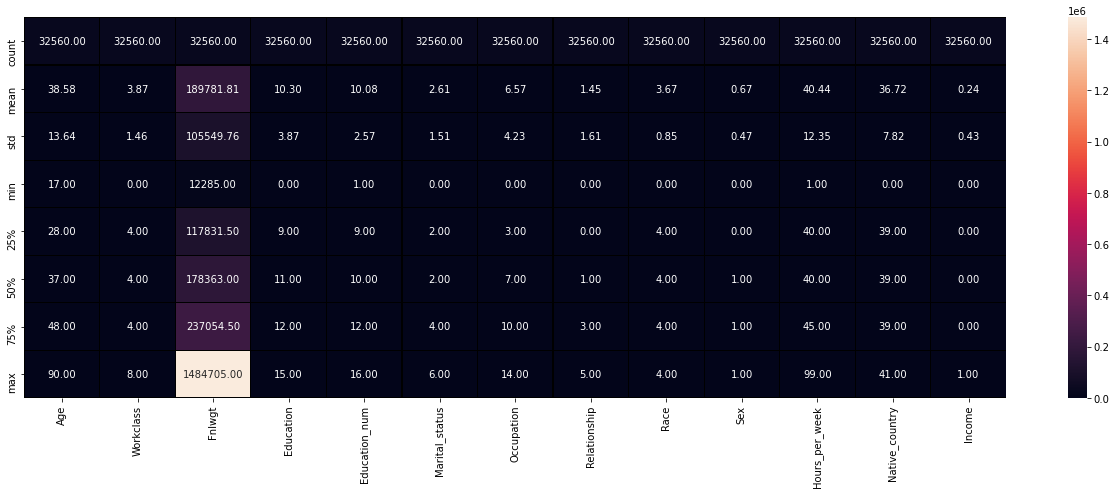

In [29]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),linecolor='black',linewidth=0.2,fmt='0.2f',annot=True)

In [30]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.229312,-0.008125,0.215995


<AxesSubplot:>

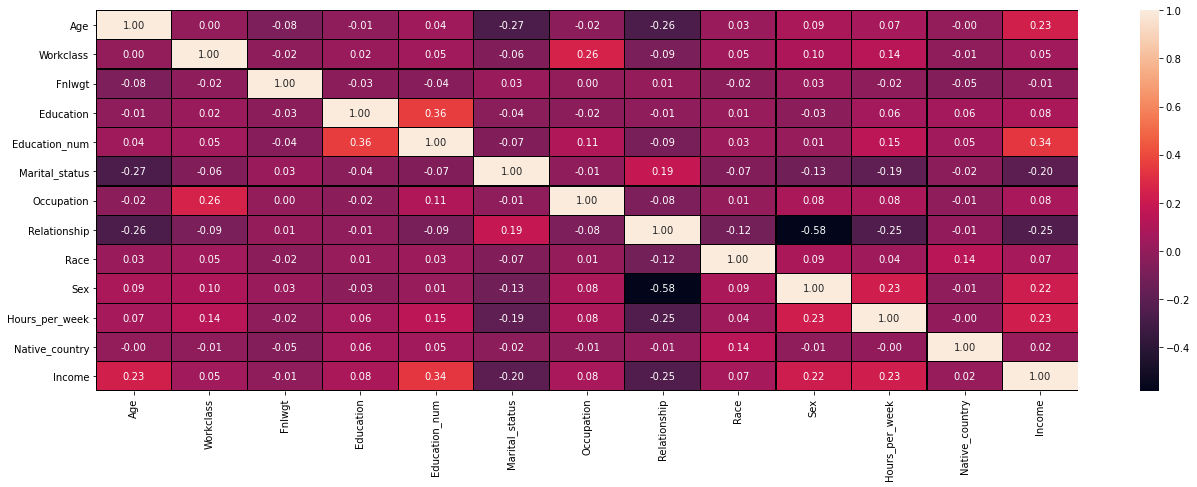

In [31]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),linecolor='black',linewidth=0.2,fmt='0.2f',annot=True)

# Outliers checking

In [32]:
df.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

-/+ 0.5 is the limit

<AxesSubplot:>

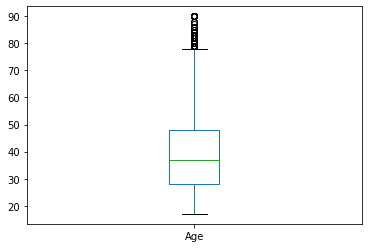

In [33]:
df['Age'].plot.box()

<AxesSubplot:>

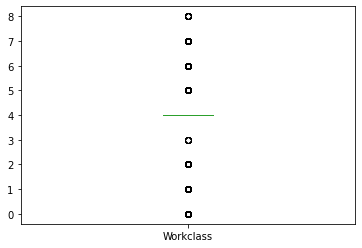

In [34]:
df['Workclass'].plot.box()

<AxesSubplot:>

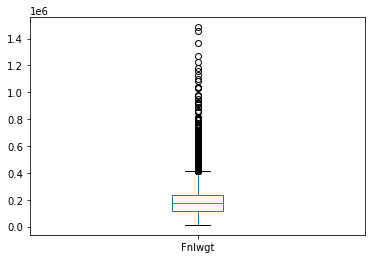

In [35]:
df['Fnlwgt'].plot.box()

<AxesSubplot:>

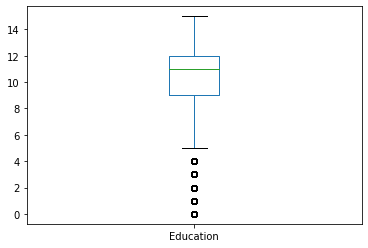

In [36]:
df['Education'].plot.box()

<AxesSubplot:>

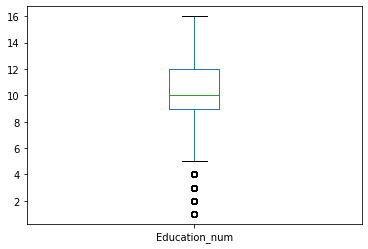

In [37]:
df['Education_num'].plot.box()

<AxesSubplot:>

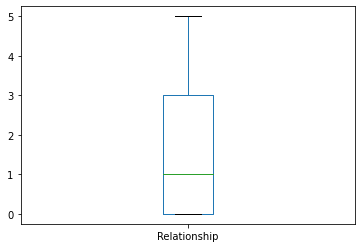

In [38]:
df['Relationship'].plot.box()

<AxesSubplot:>

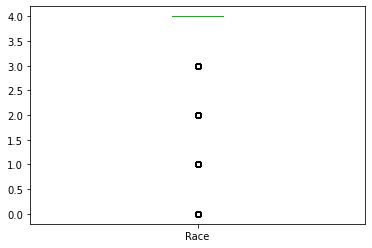

In [39]:
df['Race'].plot.box()

<AxesSubplot:>

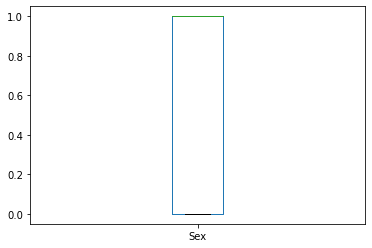

In [40]:
df['Sex'].plot.box()

<AxesSubplot:>

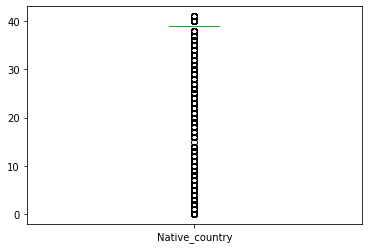

In [41]:
df['Native_country'].plot.box()

<AxesSubplot:>

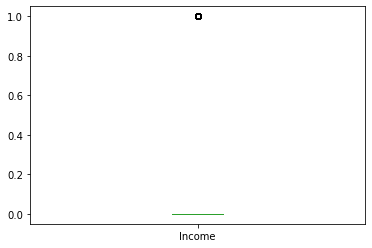

In [42]:
df['Income'].plot.box()

# Outlier Removal

In [43]:
df.shape

(32560, 13)

In [44]:
from scipy.stats import zscore

In [45]:
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552]),
 array([11, 10,  8, ...,  8,  8,  8]))

In [46]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,40,39,0
4,37,4,284582,12,14,2,4,5,4,0,40,39,0
5,49,4,160187,6,5,3,8,1,2,0,16,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,20,39,0


Percentage Dataloss

In [47]:
Data_loss=((32560-28913)/32560)*100
Data_loss

11.20085995085995

# Separating data in x and y

In [48]:
x=df.drop('Income',axis=1)
y=df['Income']

In [49]:
from sklearn.preprocessing import power_transform

In [50]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.89194657,  1.64422286, -1.08988899, ...,  0.70308748,
        -2.22151541,  0.32907402],
       [ 0.10271742,  0.01186427,  0.39874263, ...,  0.70308748,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ...,  0.70308748,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455598,  0.01186427, -0.2197547 , ..., -1.42229812,
        -0.03557001,  0.32907402],
       [-1.35834148,  0.01186427,  0.27166793, ...,  0.70308748,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ..., -1.42229812,
        -0.03557001,  0.32907402]])

# Scaling the Data

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.89194657,  1.64422286, -1.08988899, ...,  0.70308748,
        -2.22151541,  0.32907402],
       [ 0.10271742,  0.01186427,  0.39874263, ...,  0.70308748,
        -0.03557001,  0.32907402],
       [ 1.06438077,  0.01186427,  0.56254016, ...,  0.70308748,
        -0.03557001,  0.32907402],
       ...,
       [ 1.33455598,  0.01186427, -0.2197547 , ..., -1.42229812,
        -0.03557001,  0.32907402],
       [-1.35834148,  0.01186427,  0.27166793, ...,  0.70308748,
        -1.65499204,  0.32907402],
       [ 1.00782289,  0.79430139,  0.98216482, ..., -1.42229812,
        -0.03557001,  0.32907402]])

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state :-",i)
        print("Training r2_score is :-", accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100)
              

At random state 26 The model performs very well
At random state :- 26
Training r2_score is :- 81.19625307125307
Testing r2_score is :- 81.18857493857494
At random state 29 The model performs very well
At random state :- 29
Training r2_score is :- 81.2269656019656
Testing r2_score is :- 81.18857493857494
At random state 71 The model performs very well
At random state :- 71
Training r2_score is :- 81.23464373464373
Testing r2_score is :- 81.2039312039312
At random state 95 The model performs very well
At random state :- 95
Training r2_score is :- 81.18473587223588
Testing r2_score is :- 81.15786240786241
At random state 106 The model performs very well
At random state :- 106
Training r2_score is :- 81.23464373464373
Testing r2_score is :- 81.23464373464373
At random state 119 The model performs very well
At random state :- 119
Training r2_score is :- 81.2269656019656
Testing r2_score is :- 81.15786240786241
At random state 139 The model performs very well
At random state :- 139
Training 

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=712)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      4946
           1       0.22      0.14      0.18      1566

    accuracy                           0.67      6512
   macro avg       0.49      0.49      0.49      6512
weighted avg       0.63      0.67      0.65      6512



# Cross validation for logistic regression

In [58]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv :- ",j)
    print("Cross validation score is :-",lsc*100)
    print("accuracy_score is :-",lss*100)
    print("\n")

At cv :-  2
Cross validation score is :- 81.26842751842752
accuracy_score is :- 81.37285012285012


At cv :-  3
Cross validation score is :- 81.25921683652089
accuracy_score is :- 81.37285012285012


At cv :-  4
Cross validation score is :- 81.18857493857494
accuracy_score is :- 81.37285012285012


At cv :-  5
Cross validation score is :- 81.19471744471745
accuracy_score is :- 81.37285012285012


At cv :-  6
Cross validation score is :- 81.24080647487693
accuracy_score is :- 81.37285012285012


At cv :-  7
Cross validation score is :- 81.22852384221116
accuracy_score is :- 81.37285012285012


At cv :-  8
Cross validation score is :- 81.23157248157248
accuracy_score is :- 81.37285012285012


At cv :-  9
Cross validation score is :- 81.25307393002188
accuracy_score is :- 81.37285012285012




Since cross validation score and accuracy score is almost same. We are heading with good approach

In [59]:
lsscore_selected=cross_val_score(lr,x,y,cv=2).mean()
print("The cv score is: ",lsscore_selected,"\n The accuracy_score is: ",lss)


The cv score is:  0.8126842751842751 
 The accuracy_score is:  0.8137285012285013


# AUC ROC Curve

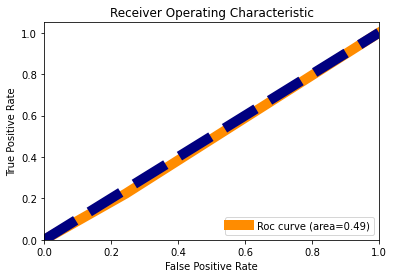

In [60]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



# Model Saving

In [61]:
import pickle
filename='Census.pk1'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [62]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
df_com
                    

,original,predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
6507,0,0
6508,0,0
6509,0,0
6510,1,1
